In [1]:
import nltk
import json
from tqdm import tqdm
import time
import re
from textblob import TextBlob
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
nltk.download('stopwords')
from nltk.corpus import stopwords
# stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
file_d = []
reviews_sent = []
reviews_neg_sent = []
reviews_pos_sent = []
reviews_str = ""
reviews_pos_str = ""
reviews_neg_str = ""

In [5]:
# file = '/Users/gkhanna/Downloads/by_helpful.json'
file = '/Users/gkhanna/Downloads/reviews_Home_and_Kitchen_5.json'

Reading "count" of the file for faster experiments
count = 0 pulls in all data

In [6]:
# Reading count number of JSON lines from the file
count = 0
n = 0
with open(file, "r") as f:
    for line in tqdm(f):
        file_d.append(json.loads(line))
        n =  n + 1
        if count > 0 and n == count:
            break
    


551682it [00:07, 78633.95it/s]


In [7]:
# Checking the structures
print(len(file_d))


551682


In [8]:
file_d[1]

{'reviewerID': 'A1JVQTAGHYOL7F',
 'asin': '0615391206',
 'reviewerName': 'Michelle Dinh',
 'helpful': [0, 0],
 'reviewText': 'I bought this zoku quick pop for my daughterr with her zoku quick maker. She loves it and have fun to make her own ice cream.',
 'overall': 5.0,
 'summary': 'zoku',
 'unixReviewTime': 1403049600,
 'reviewTime': '06 18, 2014'}

Read in reviews that correspond to the list of ASIN's (Amazon product ID's) selected. 
Choosing the ASIN that has ~ 1000 reviews from the EDA

In [9]:
# ASIN corresponding to the Iron Skillet
pl = 'B00006JSUA'
# Tumbler
# pl = 'B000QFDNP8'

In [10]:
# ASIN's for Iron Skillets from Jey's web scraping
# pl = ['B075MRX5N3', 'B06XT6GZ9V', 'B00006JSUA', 'B00006JSUA', 'B07GKZXS2T', 'B000VTOG78', 'B00X4WQMAS', 'B00G2XGC88', 'B073Q8P6CQ', 'B073Q8DY3F']

In [11]:
# Trying out the ASIN's for toothbrush holder
# pl = ['B078GVMVRH', 'B078GVH2VJ', 'B00SX07354', 'B00CC6XSRC', 'B0777SKKBL', 'B072YVWBXH', 'B01AKGRTUM', 'B07CMHRZRT', 'B07CMHRZS2', 'B073Q58L6Q']

In [12]:
# Getting the reviews out of the dictionary into lists
count = 0
n = 0
filter_l = pl
for r in tqdm(file_d):
    if (filter_l and (r['asin'] == filter_l)) or not filter_l:
        reviews_sent.append(r['reviewText'])
        if ((r['overall'] == 1.0) or (r['overall'] == 2.0)):
            reviews_neg_sent.append(r['reviewText'])
        else:
            reviews_pos_sent.append(r['reviewText'])
        n =  n + 1
        if count > 0 and n == count:
            break

100%|██████████| 551682/551682 [00:00<00:00, 1664892.13it/s]


In [13]:

print(len(reviews_sent))
print(reviews_sent[0])

1064
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.


In [14]:
print(len(reviews_pos_sent))
print(reviews_pos_sent[0])

1022
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.


In [15]:
print(len(reviews_neg_sent))
print(reviews_neg_sent[0])

42
I've always bought the regular Lodge skillets and loved them.  Went with the pre-seasoned this time because I wanted this size.Wow, what a pain.  I picked the best I could find from a stack on a big-box store shelf, so I know I didn't get a lemon (unless the whole batch was badly pre-seasoned!).  The coating flaked off, got my hands black, and smelled really rusty.  No WAY I could cook with it that way!It has taken me about five rounds of boiling soapy water and then vinegar and water to get most of that nasty coating off of there with a steel scurbber.  (Then I seasoned by coating with oil and heating in the oven for 20 minutes.I'm still wary of that residue.  Never have I seen (and smelled) so much rust (trapped UNDER the coating) come off a skillet--new or badly stored in a garage.  This was horrible.I'm used to cast iron, for sure.  Been using good old American-made Lodge skillets for years, plus we regularly use a big cast iron wok imported from China.So, I'm giving only two st

In [16]:
# summarize(reviews_neg_sent[0], .8)

In [17]:
# Had to install spacy and neuralcoref
# import spacy # version 2.1.3
# import neuralcoref # version 4.0
from textblob import TextBlob

In [18]:
# nlp = spacy.load('en_core_web_sm')

In [19]:
def extractSubjectiveFromString(review):
    """
    Input: entire review document (str)
    Output: shortened review document with only subjective sentences
    """
    sent_list = nltk.sent_tokenize(review)
    output = ""  # output string
    for sent in sent_list:
        result = TextBlob(sent)
        if result.sentiment[1] > 0.5:  # keep sentences with sentiment > 0.25
            output += sent+" "
    return output

def extractSubjective(sent_list):
    """
    Input: A list of sentences
    Output: shortened review document with only subjective sentences
    """
    
    output = []  # output string
    for sent in sent_list:
        result = TextBlob(sent)
        if result.sentiment[1] > 0.5:  # keep sentences with sentiment > 0.25
            output.append(sent)
    return output

# spacy
# def replacePronouns(review):
#     """
#     Input: entire review document (str), multiple sentence_scores
#     Output: string, modified review with pronouns replaced.
#     """

#     # create spacy model
#     # nlp = spacy.load('en_core_web_sm')
#     # add neuralcoref to spacy model
#     neuralcoref.add_to_pipe(nlp, greedyness=0.50, max_dist=10)

#     pn = nlp(review)  # pn = pronoun doc
#     # print("has coreferences?  {}".format(pn._.has_coref))
#     # print("Coreferences:")
#     # print(pn._.coref_clusters)

#     return pn._.coref_resolved



In [20]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"did n't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}


In [21]:
def clean(text, remove_stopwords = False):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls'''

    # Convert words to lower case
    text = text.lower()

    # Replace contractions with their longer forms
    text = text.split()
    new_text = []
    for word in text:
        if word in contractions:
            new_text.append(contractions[word])
        else:
            new_text.append(word)
    text = " ".join(new_text)

    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', ' ', text)
    text = re.sub(r'["\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)

    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [22]:
# Experiments on the reviews
# extractSubjective(reviews_sent)

In [23]:
# extractSubjective(reviews_neg_sent[0])

In [24]:
# replacePronouns(reviews_neg_sent[0])

In [25]:
# Getting reviews into strings
reviews_str = " ".join(s for s in reviews_sent)


In [26]:
reviews_pos_str = " ".join(s for s in reviews_pos_sent)
reviews_neg_str = " ".join(s for s in reviews_neg_sent)

In [27]:
print(len(reviews_str))
print(len(reviews_pos_str))
print(len(reviews_neg_str))

599426
573578
25847


In [28]:
print(reviews_str[:100])
print(reviews_pos_str[:100])
print(reviews_neg_str[:100])

Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of c
Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of c
I've always bought the regular Lodge skillets and loved them.  Went with the pre-seasoned this time 


In [29]:
# reviews_str = clean(reviews_neg_str)
# reviews_pos_str = clean(reviews_pos_str)
# reviews_neg_str = clean(reviews_neg_str)

Summarizing before doing anything else with the review strings
We'll skip summarization as there's danger of losing information

In [30]:
from gensim.summarization import summarize

In [31]:
reviews_str = summarize(reviews_str, ratio=.5)
reviews_pos_str = summarize(reviews_pos_str, ratio = .5)
reviews_neg_str = summarize(reviews_neg_str, ratio = .5)

In [32]:
print(len(reviews_str))
print(len(reviews_pos_str))
print(len(reviews_neg_str))

399138
382163
16814


Separating out sentences into a list
PunktSentenceTokenizer is customized to separate sentences on a few extra words and characters as wel

In [33]:
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktLanguageVars
'''We customize the ReviewLangVars class to separate sentences based on some additional keywords'''


class ReviewLangVars(PunktLanguageVars):
    # sent_end_chars = ('pros:', 'cons:', '[','][','.','?','!')
     sent_end_chars = ('pros:', 'cons:', '[', '][', '.' ,'?', '!', ']' )
    
sent_tokenizer1 = PunktSentenceTokenizer(lang_vars = ReviewLangVars())
# sent_tokenizer1 = PunktSentenceTokenizer()
sent_fullreview = sent_tokenizer1.tokenize(reviews_str)
sent_neg_review = sent_tokenizer1.tokenize(reviews_neg_str)
sent_pos_review = sent_tokenizer1.tokenize(reviews_pos_str)

In [34]:
# This are the original sentences tokenized
print(sent_fullreview[0])
print(len(sent_fullreview))

Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.
3348


In [35]:
# This are the negative sentences tokenized
print(sent_neg_review[0])
print(len(sent_neg_review))

I've always bought the regular Lodge skillets and loved them.
131


In [36]:
# This are the positive sentences tokenized
print(sent_pos_review[0])
print(len(sent_pos_review))

Just say no to chemical treatments on non stick pans, get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children, without all those unknown chemicals that are such a part of pans for the last few decades.
3218


In [37]:
# sent_pos_subj = extractSubjective(sent_pos_review)

In [38]:
# from gensim import summarization

In [39]:
# summarization.summarizer.INPUT_MIN_LENGTH=0

In [40]:
# sent_pos_summary = summarization.summarize(sent_pos_subj[0], word_count = 3)

Extracting common Items using apriori
https://github.com/asaini/Apriori

In [41]:
import sys

from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
        """calculates the support for items in the itemSet and returns a subset
       of the itemSet each of whose elements satisfies the minimum support"""
        _itemSet = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)

        return _itemSet


def joinSet(itemSet, length):
        """Join a set with itself and returns the n-element itemsets"""
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)

    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minSupport,
                                        freqSet)

    currentLSet = oneCSet
    k = 2
    while(currentLSet != set([])):
        largeSet[k-1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(currentLSet,
                                                transactionList,
                                                minSupport,
                                                freqSet)
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
            """local function which Returns the support of an item"""
            return float(freqSet[item])/len(transactionList)

    toRetItems = []
    for key, value in tqdm(list(largeSet.items())):
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])

    toRetRules = []
    for key, value in tqdm(list(largeSet.items())[1:]):
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)),
                                           confidence))
    return toRetItems, toRetRules


def printResults(items):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    for item, support in sorted(items, key=lambda item_support: item_support[1], reverse=True):
        print(str(item), support)

In [42]:
# Utility functions
# from nltk.corpus import stopwords
# stopwords = stopwords.words('english')

lem = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
lem_word_mapping = {}

# Find leaves of a tree
def leaves(tree):
    """Finds leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label() in ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']):
        yield subtree.leaves()
    
# def stem(word):
#     """Normalises words to lowercase and stems and lemmatizes it."""
#     word = word.lower()
#     word = word.replace("'","").replace('"','').replace('.','')
#     word1 = stemmer.stem(word)
#     return word1

# lowercase, stem and lemmatize
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    # word1 = stemmer.stem(word)
    word2 = lem.lemmatize(word)
    if word != word2:
        lem_word_mapping[word2] = word
    return word2

def acceptableWord(word):
    """Checks conditions for acceptable word: length, stopword."""
    # accepted = bool((2 <= len(word) <= 40) and word.lower() not in stopwords)
    accepted = bool((2 <= len(word) <= 40) and word.lower())
    return accepted

# extract words after normalizing and checking if acceptable
def getTerms(tree):
    """Returns the words after checking acceptable conditions, normalizing and lemmatizing"""
    term = [ normalise(w) for w in tree if acceptableWord(w) ]
    return term
    
def getNorm(tree):
    """Parse leaves in chunk and return after checking acceptable conditions, normalizing and lemmatizing"""
    for leaf in leaves(tree):
        term = [ normalise(w) for w,t in leaf if acceptableWord(w) ]
        yield term

Set of nouns for each sentence

In [43]:
# Set of nouns for the apriori algorithm

def isNoun(n):
    if n=='NN' or n=='NNS' or n=='NNP' or n=='NNPS':
        return True

revset=[]
for line in tqdm(sent_fullreview):
    # print(line)
    a = nltk.word_tokenize(line)
    # print(a)
    nouns = [word for (word, pos) in nltk.pos_tag(a) if isNoun(pos)] 
    # print(nouns)
    terms = getTerms(nouns)
    # print(terms)

    revset.append(terms)



100%|██████████| 3348/3348 [00:06<00:00, 518.66it/s]


In [44]:
print(revset[0])
print(revset[:10])

['treatment', 'stick', 'pan', 'friend', 'size', 'cast', 'iron', 'pan', 'child', 'chemical', 'part', 'pan', 'decade']
[['treatment', 'stick', 'pan', 'friend', 'size', 'cast', 'iron', 'pan', 'child', 'chemical', 'part', 'pan', 'decade'], ['lodge', 'skillet'], ['went', 'time', 'size.wow', 'pain'], ['stack', 'store', 'shelf', 'lemon', 'batch'], ['oil', 'heating', 'oven', 'minutes.i', 'residue'], ['rust', 'coating', 'skillet', 'garage'], ['iron'], ['lodge', 'skillet', 'year', 'cast', 'iron', 'wok', 'china.so', 'star', 'pre-seasoning', 'hassle.now', 'dinner'], ['review', 'pan', 'water'], ['review']]


In [45]:
len(revset)

3348

Extracting the items contained in the reviews

In [46]:
items, rules = runApriori(revset, 0.1, 0.6)
printResults(items)

100%|██████████| 1/1 [00:00<00:00, 3248.88it/s]

('pan',) 0.32855436081242534
('iron',) 0.3064516129032258
('skillet',) 0.271505376344086
('cast',) 0.23058542413381122
('iron', 'cast') 0.22759856630824374
('lodge',) 0.10991636798088411


In [47]:
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Polarity of the sentences, conventional Liu and Hu Opinion Lexicon
TBD: We may want to substitute with a more advanced sentiment detection algorithm

In [48]:

def custom_liu_hu_lexicon(sentence):
    '''Takes in a sentence and returns the sentiment of the sentence by counting the no of positive and negitive 
    and negitive words and by reversing the sentiment if the words NO or NOT are present
    '''
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    x = list(range(len(tokenized_sent))) 
    y = []
    isNegation = False
    negationWords = ['no','not','never','none','hardly','rarely','scarcely']

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
            y.append(1) # positive
        elif word in opinion_lexicon.negative():
            neg_words += 1
            y.append(-1) # negative
        else:
            y.append(0) # neutral
            
        if word in negationWords:
            isNegation = True

    if pos_words > neg_words and isNegation==True:
        return 'neg'
    elif pos_words > neg_words:
        return 'pos'
    elif pos_words < neg_words and isNegation==True:
        return 'pos'
    elif pos_words < neg_words:
        return 'neg'
    # Changed from neutral to negative
    # Not using neutral for this version
    elif pos_words == neg_words:
        return 'neg'

In [49]:
def getPolarity(sentence):
    """
    Input: A sentence from review
    Output: polarity based on textblob polarity score
    """
    blob = TextBlob(sentence)
    print(format(blob.sentiment))
    if blob.sentiment[0] > 0.1:
        return 'pos'
    elif blob.sentiment[0] < 0.1:
        return 'neg'
    else:
        return 'neutral'

In [50]:

neutral_review=[]
positive_review=[]
negative_review=[]

for sentence in tqdm(sent_pos_review):
    for i in items:
        if i[0][0] in sentence:
#             print(i[0][0] +"--" + sentence)
            sentence = clean(sentence)
            x=getPolarity(sentence)
            if(x=="pos"):
                positive_review.append(sentence)
            elif(x=="neg"):
                negative_review.append(sentence)
            else:
                neutral_review.append(sentence)
            break

# Extracting sentiments from the negative reviews
for sentence in tqdm(sent_neg_review):
    for i in items:
        if i[0][0] in sentence:
#             print(i[0][0] +"--" + sentence)
            sentence = clean(sentence)
            x=getPolarity(sentence)
            if(x=="pos"):
                positive_review.append(sentence)
            elif(x=="neg"):
                negative_review.append(sentence)
            else:
                neutral_review.append(sentence)
            break
            
print('done')

  9%|▉         | 295/3218 [00:00<00:00, 2948.62it/s]

Sentiment(polarity=-0.10925925925925928, subjectivity=0.27592592592592596)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25625, subjectivity=0.6125)
Sentiment(polarity=0.2, subjectivity=0.75)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.35714285714285715)
Sentiment(polarity=0.36111111111111116, subjectivity=0.6055555555555555)
Sentiment(polarity=0.3, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.35714285714285715)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.47000000000000003, subjectivity=0.5666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.06666666666666667, subjectivity=0.5333333333333333)
Sentiment(polarity=0.5499999999999999, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.65, subjectivity=0.625)
Sentiment(polarity=0.4166666666666667, subjectivity=0.4583333333333333)
Sentiment(polarity=0.5, subje

 24%|██▎       | 760/3218 [00:00<00:00, 3310.90it/s]


Sentiment(polarity=0.3499999999999999, subjectivity=0.6166666666666667)
Sentiment(polarity=0.26249999999999996, subjectivity=0.3875)
Sentiment(polarity=0.0625, subjectivity=0.275)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6699999999999999, subjectivity=0.77)
Sentiment(polarity=0.06114718614718614, subjectivity=0.5887445887445887)
Sentiment(polarity=0.26623376623376627, subjectivity=0.5493506493506494)
Sentiment(polarity=-0.033333333333333326, subjectivity=0.3)
Sentiment(polarity=0.1, subjectivity=0.2)
Sentiment(polarity=0.5, subjectivity=0.8888888888888888)
Sentiment(polarity=0.275, subjectivity=0.5875)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.30000000000000004)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3, subjectivity=0.48)
Sentiment(polarity=0.5, subjectivity=0.55)
Sentiment(polarity=0.25, subjectivity=0.4777777777777778)
Sentiment(polarity=0.1875, subject

Sentiment(polarity=0.2715909090909091, subjectivity=0.32613636363636367)
Sentiment(polarity=0.056060606060606054, subjectivity=0.6172727272727273)
Sentiment(polarity=-0.016666666666666663, subjectivity=0.2333333333333333)
Sentiment(polarity=0.24999999999999997, subjectivity=0.45)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.45, subjectivity=0.7944444444444444)
Sentiment(polarity=0.16666666666666666, subjectivity=0.43333333333333335)
Sentiment(polarity=-0.3125, subjectivity=0.6375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.375)
Sentiment(polarity=0.2375, subjectivity=0.2833333333333333)
Sentiment(polarity=0.3333333333333333, subjectivity=1.0)
Sentiment(polarity=-0.02777777777777778, subjectivity=0.24444444444444446)
Sentiment(polarity=0.25833333333333336, subjectivity=0.75)
Sentiment(polarity=0.22999999999999998, subjectivity=0.72)
Sentiment(polarity=0.4333333

 47%|████▋     | 1524/3218 [00:00<00:00, 3397.65it/s]

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.035, subjectivity=0.39)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.6, subjectivity=0.6)
Sentiment(polarity=0.35833333333333334, subjectivity=0.325)
Sentiment(polarity=-0.15833333333333333, subjectivity=0.2833333333333333)
Sentiment(polarity=0.125, subjectivity=0.21666666666666667)
Sentiment(polarity=0.21666666666666667, subjectivity=0.5666666666666667)
Sentiment(polarity=0.15, subjectivity=0.35)
Sentiment(polarity=0.3333333333333333, subjectivity=0.5499999999999999)
Sentiment(polarity=0.21428571428571427, subjectivity=0.42857142857142855)
Sentiment(polarity=-0.06666666666666665, subjectivity=0.43333333333333335)
Sentiment(polarity=-0.39285714285714285, subjectivity=0.7142857142857143)
Sentiment(polarity=0.11666666666666665, subjectivity=0.9166666666666666)
Sentiment(polarity=0.0175, subjectivity=0.45749999999999996)
Sentiment(polarity=-0.3878787

Sentiment(polarity=0.2791666666666667, subjectivity=0.6125)
Sentiment(polarity=0.6, subjectivity=0.7)
Sentiment(polarity=0.16666666666666666, subjectivity=0.625)
Sentiment(polarity=0.5, subjectivity=0.4854166666666666)
Sentiment(polarity=-0.05, subjectivity=0.2)
Sentiment(polarity=0.4119047619047619, subjectivity=0.4153061224489796)
Sentiment(polarity=0.06818181818181818, subjectivity=0.7272727272727273)
Sentiment(polarity=-0.08666666666666667, subjectivity=0.5833333333333334)
Sentiment(polarity=0.65, subjectivity=0.675)
Sentiment(polarity=0.04583333333333334, subjectivity=0.6125)
Sentiment(polarity=0.2125, subjectivity=0.7000000000000001)
Sentiment(polarity=0.0, subjectivity=0.625)
Sentiment(polarity=-0.08333333333333333, subjectivity=0.2833333333333333)
Sentiment(polarity=-0.175, subjectivity=0.4)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.125, subjectivity=0.6666666666666666)
Sentiment(polarity=0.43333333333333335, subjec

 75%|███████▍  | 2405/3218 [00:00<00:00, 3597.82it/s]


Sentiment(polarity=0.1683673469387755, subjectivity=0.42040816326530617)
Sentiment(polarity=0.5666666666666667, subjectivity=0.6333333333333333)
Sentiment(polarity=0.16666666666666666, subjectivity=0.2222222222222222)
Sentiment(polarity=0.3333333333333333, subjectivity=0.5)
Sentiment(polarity=0.09687499999999999, subjectivity=0.459375)
Sentiment(polarity=0.2425, subjectivity=0.6950000000000001)
Sentiment(polarity=0.2833333333333334, subjectivity=0.43333333333333335)
Sentiment(polarity=0.2583333333333333, subjectivity=0.6333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.16, subjectivity=0.5399999999999999)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.125, subjectivity=0.925)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4666666666666666, subjectivity=0.3857142857142857)
Sentiment(polarity=0.0, subjectivity=0.6785714285714286)
Sentiment(po

 85%|████████▌ | 2745/3218 [00:00<00:00, 3393.85it/s]

Sentiment(polarity=0.31666666666666665, subjectivity=0.5499999999999999)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.08444444444444445, subjectivity=0.5458333333333334)
Sentiment(polarity=0.2111111111111111, subjectivity=0.3444444444444444)
Sentiment(polarity=-0.2, subjectivity=0.5750000000000001)
Sentiment(polarity=0.125, subjectivity=0.925)
Sentiment(polarity=-0.05, subjectivity=0.4)
Sentiment(polarity=0.018750000000000003, subjectivity=0.31875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.025, subjectivity=0.05)
Sentiment(polarity=0.052500000000000005, subjectivity=0.26)
Sentiment(polarity=0.03333333333333333, subjectivity=0.375)
Sentiment(polarity=0.3071428571428571, subjectivity=0.48888888888888893)
Sentiment(polarity=0.3666666666666667, subjectivity=0.7000000000000001)
Sentiment(polarity=0.08055555555555556, subjectivi

100%|██████████| 131/131 [00:00<00:00, 4284.88it/s]


Sentiment(polarity=0.43333333333333335, subjectivity=0.7194444444444446)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.36883116883116884, subjectivity=0.6041396103896104)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.4)
Sentiment(polarity=0.20192307692307693, subjectivity=0.44423076923076926)
Sentiment(polarity=0.20486111111111113, subjectivity=0.5444444444444444)
Sentiment(polarity=0.35, subjectivity=0.47857142857142865)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.09375, subjectivity=0.2833333333333333)
Sentiment(polarity=0.3333333333333333, subjectivity=0.7000000000000001)
Sentiment(polarity=0.125, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3, subjectivity=0.3)
Sentiment(polarity=0.20625, subjectivity=0.75)
Sentiment(polarity=-0.25, subjectivity=0.4)
Sentiment(polarity=0.26666666666666666, 

In [51]:
# # Extracting sentiments from the positive reviews
# neutral_review=[]
# positive_review=[]
# negative_review=[]

# for sentence in tqdm(sent_fullreview):
#     x=custom_liu_hu_lexicon(sentence)
#     if(x=="pos"):
#         positive_review.append(sentence)
#     elif(x=="neg"):
#         negative_review.append(sentence)
#     else:
#         neutral_review.append(sentence)
# print('done')

In [52]:
print(len(positive_review))

1369


In [53]:
print(len(negative_review))

1008


In [54]:
print(len(neutral_review))

29


In [55]:
positive_review

[' if you are familiar with cast iron  and are willing to give it the minimal care it requires  you will love this ',
 'i enjoy using it  do not mind caring for it  and appreciate the finished product only cast iron cooking delivers ',
 'a nice piece of cast iron ',
 'a true cast iron pan is super smooth ',
 'with proper seasoning  not the garbage spray lodge puts on  a nice piece of cast iron will be virtuly non stick ',
 'in fact  after cooking my first fillet mignon in this skillet i realized it is actually better suited to this cut of meat than an outdoor grill   it leaves a perfectly seared  caramelized exterior and a nice red interior  just like i like it  ',
 'i would also recommend the griddle   it s great if you are going between the 10 and 12 inch pan   get the 12 there is more room for a full steak ',
 'but for a skillet that has never been used before that is better than great ',
 'my mother and mother in law both cook with skillets that have been well seasoned  and i am ve

In [56]:
negative_review

['just say no to chemical treatments on non stick pans  get yourself and your friends a few sizes of cast iron and have pans that you can pass down to your children  without all those unknown chemicals that are such a part of pans for the last few decades ',
 'i read a 3 star review complaining that the pan rusts if water is left in it ',
 'lodge simply does not take the time anymore to proplery finish their pans ',
 'lodge simply does not spend the time to finish their pans like they used to and the pans suffer now ',
 'i got this for the hype of searing steaks and etc on cast iron ',
 'enter the lodge 12 inch cast iron skillet ',
 'i use this skillet all the time cooking steaks and when i fry anything ',
 'you really cannot go wrong with lodge logic  it is seen as the top cast iron for a reason ',
 'i like all my cast iron ',
 'like alton brown says  this is the pan to have ',
 'i did let the pan heat up  sprayed it with pam  fried my eggs and they slid off like from teflon ',
 'if y

### At this point we start tokenization and preparing for POS
If we do more clean up here, would it hurt POS? 

In [57]:
# Convert all sentences into tokens/words
all_sen_tok = []
for sentence in tqdm(sent_fullreview):
    all_sen_tok.append(nltk.word_tokenize(sentence))

100%|██████████| 3348/3348 [00:00<00:00, 6283.87it/s]


In [58]:
positive_review_clean = []
for sentence in tqdm(positive_review):
    positive_review_clean.append(clean(sentence, remove_stopwords=True))

100%|██████████| 1369/1369 [00:00<00:00, 1940.24it/s]


In [59]:
print(len(positive_review_clean))
print(positive_review_clean[0])

1369
familiar cast iron willing give minimal care requires love


In [60]:
negative_review_clean = []
for sentence in tqdm(negative_review):
    negative_review_clean.append(clean(sentence, remove_stopwords=True))
    
print(len(negative_review_clean))
print(negative_review_clean[0])

100%|██████████| 1008/1008 [00:00<00:00, 2279.74it/s]

1008
say chemical treatments non stick pans get friends sizes cast iron pans pass children without unknown chemicals part pans last decades


### Since the sentences are clean now, we should do n gram TF-IDF

In [61]:
vectorizer_pos = TfidfVectorizer(ngram_range=(2,3))
tf_pos = vectorizer_pos.fit_transform(positive_review_clean)
feature_names_pos = vectorizer_pos.get_feature_names()
phrase_scores_pos = vectorizer_pos.idf_ 
names_scores_df_pos = pd.DataFrame({'feature_names':feature_names_pos})
names_scores_df_pos['phrase_scores'] = pd.DataFrame(phrase_scores_pos)
print(names_scores_df_pos.size)

54890


In [62]:
names_scores_df_pos.head()

,feature_names,phrase_scores
0,00 amazon,7.529419
1,00 amazon used,7.529419
2,0000 coat,7.529419
3,0000 coat lard,7.529419
4,10 12,6.836272


In [63]:
vectorizer_neg = TfidfVectorizer(ngram_range=(2,3), use_idf=True)
tf_neg = vectorizer_neg.fit_transform(negative_review_clean)
feature_names_neg = vectorizer_neg.get_feature_names()
phrase_scores_neg = vectorizer_neg.idf_ 
names_scores_df_neg = pd.DataFrame({'feature_names':feature_names_neg})
names_scores_df_neg['phrase_scores'] = pd.DataFrame(phrase_scores_neg)
print(names_scores_df_neg.size)

33766


In [64]:
names_scores_df_neg.head()

,feature_names,phrase_scores
0,06 30,7.223568
1,06 30 14,7.223568
2,10 12,7.223568
3,10 12 15,7.223568
4,10 25,6.530421


In [65]:
names_scores_df_pos[names_scores_df_pos.feature_names == 'hot water']

,feature_names,phrase_scores
10201,hot water,5.178044


In [66]:
names_scores_df_pos.sort_values(by='phrase_scores', ascending=False)

,feature_names,phrase_scores
0,00 amazon,7.529419
18012,pre seasoned pieces,7.529419
18027,pre seasoning done,7.529419
18026,pre seasoning cast,7.529419
18024,pre seasonedaccording enclosed,7.529419
18023,pre seasonedaccording,7.529419
18022,pre seasoned well,7.529419
18021,pre seasoned vegetable,7.529419
18020,pre seasoned useful,7.529419
18019,pre seasoned use,7.529419


### Grunt work of Tokenization and POS tagging

In [67]:
# Convert positive, negative and neutral sentences into tokens/words
pos_sen_tok = []
neg_sen_tok = []
for sentence in tqdm(positive_review_clean):
    pos_sen_tok.append(nltk.word_tokenize(sentence))
for sentence in tqdm(negative_review_clean):
    neg_sen_tok.append(nltk.word_tokenize(sentence))

100%|██████████| 1008/1008 [00:00<00:00, 8043.23it/s]


In [68]:
neg_sen_tok

[['say',
  'chemical',
  'treatments',
  'non',
  'stick',
  'pans',
  'get',
  'friends',
  'sizes',
  'cast',
  'iron',
  'pans',
  'pass',
  'children',
  'without',
  'unknown',
  'chemicals',
  'part',
  'pans',
  'last',
  'decades'],
 ['read',
  '3',
  'star',
  'review',
  'complaining',
  'pan',
  'rusts',
  'water',
  'left'],
 ['lodge', 'simply', 'take', 'time', 'anymore', 'proplery', 'finish', 'pans'],
 ['lodge',
  'simply',
  'spend',
  'time',
  'finish',
  'pans',
  'like',
  'used',
  'pans',
  'suffer'],
 ['got', 'hype', 'searing', 'steaks', 'etc', 'cast', 'iron'],
 ['enter', 'lodge', '12', 'inch', 'cast', 'iron', 'skillet'],
 ['use', 'skillet', 'time', 'cooking', 'steaks', 'fry', 'anything'],
 ['really',
  'can',
  'not',
  'go',
  'wrong',
  'lodge',
  'logic',
  'seen',
  'top',
  'cast',
  'iron',
  'reason'],
 ['like', 'cast', 'iron'],
 ['like', 'alton', 'brown', 'says', 'pan'],
 ['let',
  'pan',
  'heat',
  'sprayed',
  'pam',
  'fried',
  'eggs',
  'slid',
  'li

In [69]:

print(pos_sen_tok[0])
print(neg_sen_tok[0])

['familiar', 'cast', 'iron', 'willing', 'give', 'minimal', 'care', 'requires', 'love']
['say', 'chemical', 'treatments', 'non', 'stick', 'pans', 'get', 'friends', 'sizes', 'cast', 'iron', 'pans', 'pass', 'children', 'without', 'unknown', 'chemicals', 'part', 'pans', 'last', 'decades']


In [70]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/gkhanna/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [71]:
# Gave an error without downloading the nltk averaged_perceptron_tagger
# Find POS tags for all the sentences
all_sen_tok_tagged = []
for sentence_t in tqdm(all_sen_tok):
    all_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))

100%|██████████| 3348/3348 [00:03<00:00, 947.72it/s] 


In [72]:
# Gave an error without downloading the nltk averaged_perceptron_tagger
# Find POS tags for positive, negative and neutral sentences
pos_sen_tok_tagged = []
neg_sen_tok_tagged = []

for sentence_t in tqdm(pos_sen_tok):
    pos_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))
for sentence_t in tqdm(neg_sen_tok):
    neg_sen_tok_tagged.append(nltk.tag.pos_tag(sentence_t))


100%|██████████| 1008/1008 [00:00<00:00, 1196.94it/s]


In [73]:
pos_sen_tok[0]

['familiar',
 'cast',
 'iron',
 'willing',
 'give',
 'minimal',
 'care',
 'requires',
 'love']

In [74]:
print(pos_sen_tok_tagged[2])

[('nice', 'JJ'), ('piece', 'NN'), ('cast', 'VBD'), ('iron', 'NN')]


In [75]:
len(neg_sen_tok_tagged)

1008

### Extract phrases that talk about features and associated sentiment/opinion

Changed to markdown as not using P9 and P10
Patterns that we want to extract
We think these are the ones that contain features

feature_patterns = r"""       
    P1:{<JJ><NN|NNS>}
    P2:{<JJ><NN|NNS><NN|NNS>}
    P3:{<RB|RBR|RBS><JJ>}
    P4:{<RB|RBR|RBS><JJ|RB|RBR|RBS><NN|NNS>}
    P5:{<RB|RBR|RBS><VBN|VBD>}
    P6:{<RB|RBR|RBS><RB|RBR|RBS><JJ>}
    P7:{<VBN|VBD><NN|NNS>}
    P8:{<VBN|VBD><RB|RBR|RBS>}
    P9:{<NN.*|JJ>*<NN.*>}
    P10:
        {<P9>}
        {<P9><IN><P9>} # Above, connected with in, of, etc
"""


In [76]:
# Patterns that we want to extract
# We think these are the ones that contain features
feature_patterns = r"""       
    P1:{<JJ><NN|NNS>}
    P2:{<JJ><NN|NNS><NN|NNS>}
    P3:{<RB|RBR|RBS><JJ>}
    P4:{<RB|RBR|RBS><JJ|RB|RBR|RBS><NN|NNS>}
    P5:{<RB|RBR|RBS><VBN|VBD>}
    P6:{<RB|RBR|RBS><RB|RBR|RBS><JJ>}
    P7:{<VBN|VBD><NN|NNS>}
    P8:{<VBN|VBD><RB|RBR|RBS>}
"""

In [77]:
# Patterns that we want to extract
# We think these are the ones that contain features
grammar = r"""       
    P1:{<DT>?<JJ>*<NN>}
"""

In [78]:
# Alternate feature patterm for experiment
# grammar = "NP:{<dt|pp|cd>?<jj||jjr|jjs>*<nn|nns|prp|nnp|in|prp\$>+<vbd|vbz|vbn|vbp|in>*<jj|rb>*<prp|nn|nns>*}"

In [79]:
# Alternate feature patterm for experiment
grammar = r"""
    P1:{<dt|pp|cd>?<jj||jjr|jjs>*<nn|nns|prp|nnp|in|prp\$>+<vbd|vbz|vbn|vbp|in>*<jj|rb>*<prp|nn|nns>*}
        """

In [80]:
grammar = r"""
        P1:{<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

        p2:{<P1><IN><P1>} # Above, connected with in, of, etc
            
        p3:{<VB.*|JJ>*}  # A series of adjectives or verts
        
        p4:{<P3><IN><P3>}
"""


In [81]:
# grammar1 = "P1:{(<JJ>* <NN.*>+ <IN>)? <JJ>* <NN.*>+}"

In [82]:
# # Find leaves of a tree
# def leaves(tree):
#     """Finds leaf nodes of a chunk tree."""
#     #for subtree in tree.subtrees(filter = lambda t: t.label() in ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']):
#     for subtree in tree.subtrees(filter = lambda t: t.label() in ['P1', 'P2', 'P3', 'P4']):
#         yield subtree.leaves()

Utility functions

In [83]:
def getTerms1(tree):
    """Returns the words after checking acceptable conditions, normalizing and lemmatizing"""
    term = [ normalise(w) for w in tree if acceptable_word(w) ]
    yield term

In [84]:
# Extract feature phrases with ngram rules
def extractFeaturePhrases(tagged, feature_patterns):
    out = []
    for phrase in tqdm(tagged):
        r_parser = nltk.RegexpParser(feature_patterns)
        # r_parser = nltk.RegexpParser(grammar)
        chunk_2 = r_parser.parse(phrase)
        term = getNorm(chunk_2)
        
        for ter in term:
            word_concat = ""
            for word in ter:
                if word_concat:
                    word_concat = word_concat + " " + word
                else:
                    word_concat = word_concat + word
                
            if (len(ter) > 1):
                out.append(word_concat)
        
    return out
 

In [85]:
extracted = extractFeaturePhrases(all_sen_tok_tagged, feature_patterns)
extracted_pos = extractFeaturePhrases(pos_sen_tok_tagged, feature_patterns)
extracted_neg = extractFeaturePhrases(neg_sen_tok_tagged, feature_patterns)    

100%|██████████| 1008/1008 [00:00<00:00, 1946.89it/s]

In [86]:
print(extracted_pos)

['familiar cast', 'give minimal', 'finished product', 'nice piece', 'cast iron', 'true cast', 'nice piece', 'cast iron', 'non stick', 'first fillet', 'realized actually', 'suited cut', 'perfectly seared', 'red interior', 'full steak', 'never used', 'well seasoned', 'happy achieve', 'properly cared', 'professional cook', 'pan regularly', 'deep frying', 'heavy pan', 'whole pan', 'cast iron', 'long time', 'great product', 'fantastic skillet', 'great size', 'skillet pure', 'explosive flavor', 'heavy hell', 'hot hold', 'standard skillet', 'easy burn', 'stir food', 'never cooked', 'nice cookware', 'keep clean', 'perfect shape', 'inch cast', 'pitted food', 'side effect', 'well seasoned', 'easily fixed', 'first time', 'bought skillet', 'really happy', 'lodge cast', 'bacon grease', 'oven heated', 'let cool', 'couple time', 'used skillet', 'produced lot', 'seasoned time', 'clean cast', 'warm dump', 'clean lint', 'free cloth', 'scrub oil', 'cooked food', 'good rinse', 'hot water', 'oven dry', 'po

In [87]:
import matplotlib
import matplotlib.pyplot as plt

Find out the most common ones, frequency distribution

[('cast iron', 116), ('hot water', 62), ("did n't", 45), ('perfect size', 30), ('non-stick pan', 28), ('first time', 28), ('first cast', 24), ('olive oil', 22), ('vegetable oil', 22), ('long time', 20), ('high heat', 20), ('well seasoned', 19), ('few time', 19), ('fried egg', 19), ('non stick', 16), ('cast-iron skillet', 16), ('high quality', 15), ('a good', 14), ('stainless steel', 14), ('little skillet', 14)]
cast iron


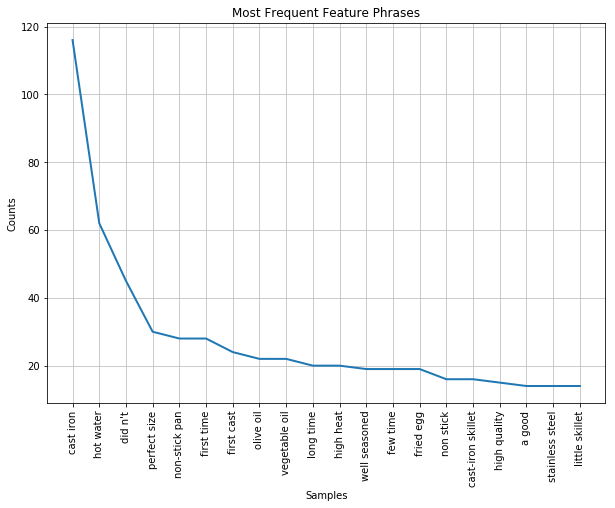

In [88]:
freqdist = nltk.FreqDist(word for word in extracted)
most_common = freqdist.most_common(25)
print(most_common[:20])
print(freqdist.max())
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

In [89]:
freqdist.pprint(maxlen = 20)

FreqDist({'cast iron': 116, 'hot water': 62, "did n't": 45, 'perfect size': 30, 'non-stick pan': 28, 'first time': 28, 'first cast': 24, 'olive oil': 22, 'vegetable oil': 22, 'long time': 20, 'high heat': 20, 'well seasoned': 19, 'few time': 19, 'fried egg': 19, 'non stick': 16, 'cast-iron skillet': 16, 'high quality': 15, 'a good': 14, 'stainless steel': 14, 'little skillet': 14, ...})


Most common positive and negative phrases

In [90]:
# Positive
freqdist_pos = nltk.FreqDist(word for word in extracted_pos)
most_common_pos = freqdist_pos.most_common(25)
print(most_common_pos[:10])
print(freqdist_pos.max())
freq_tab_pos = freqdist_pos.tabulate

[('cast iron', 91), ('non stick', 26), ('hot water', 20), ('first time', 16), ('inch skillet', 15), ('seasoned skillet', 15), ('great pan', 14), ('well seasoned', 13), ('high heat', 13), ('seasoned pan', 11)]
cast iron


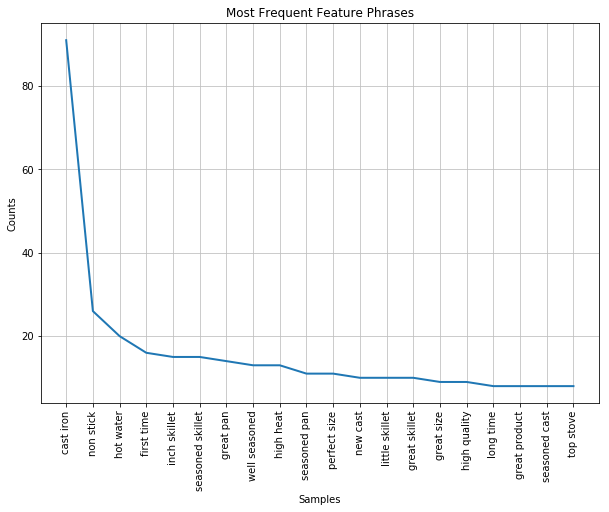

In [91]:
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist_pos.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

In [92]:
# Negative
freqdist_neg = nltk.FreqDist(word for word in extracted_neg)
most_common_neg = freqdist_neg.most_common(25)
print(most_common_neg[:10])
print(freqdist_neg.max())
freq_tab_neg = freqdist_neg.tabulate(6)

[('cast iron', 67), ('non stick', 19), ('hot water', 14), ('inch skillet', 11), ('stick pan', 10), ('used pan', 9), ('iron skillet', 7), ('vegetable oil', 7), ('olive oil', 6), ('never used', 6)]
cast iron
   cast iron    non stick    hot water inch skillet    stick pan     used pan 
          67           19           14           11           10            9 


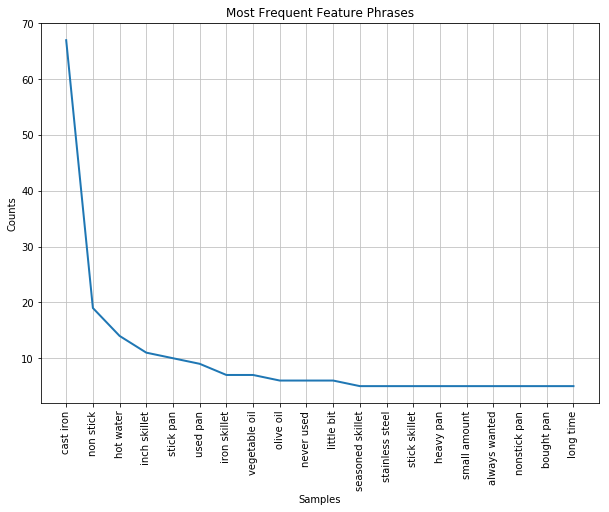

In [93]:
plt.figure(figsize=(10, 7))  # We want a bigger size plot
freqdist_neg.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

Unlemmatize and unstem using the dictionary created earlier

In [94]:
import inflect

In [95]:
def getRealWords(phrases):
    """ Unlemmatize and unstem using the dictionary created earlier """
    p = inflect.engine()
    new_phrases=[]
    for a in tqdm(phrases):
        newword="";
        found=False;
        for b in a[0].split():
            for x in lem_word_mapping:
                #print(x)
                #print(b)
                if b==x:
                    found=True
                    sing=(lem_word_mapping[x] if p.singular_noun(lem_word_mapping[x])==False else p.singular_noun(lem_word_mapping[x]))
                    if newword=="":
                        newword = newword + sing
                    else:
                        newword = newword + " " +  sing
            if found==False:
                if newword=="":
                    newword = newword + b
                else:
                    newword = newword + " " +  b
                    #print(newword)
        new_phrases.append((newword,a[1]))
    return new_phrases

In [96]:
def getRealWordsAll(phrases):
    """ Unlemmatize and unstem using the dictionary created earlier """
    p = inflect.engine()
    new_phrases=[]
    for a in tqdm(phrases):
        newword="";
        found=False;
        for b in a.split():
            for x in lem_word_mapping:
                #print(x)
                #print(b)
                if b==x:
                    found=True
                    if p.singular_noun(lem_word_mapping[x]):
                        sing = p.singular_noun(lem_word_mapping[x])
                    else:
                        sing = lem_word_mapping[x]   
                        
                    # sing=(lem_word_mapping[x] if p.singular_noun(lem_word_mapping[x])==False else p.singular_noun(lem_word_mapping[x]))
                    
                    if newword=="":
                        newword = newword + sing
                    else:
                        newword = newword + " " +  sing
            if found==False:
                if newword=="":
                    newword = newword + b
                else:
                    newword = newword + " " +  b
                    #print(newword)
        new_phrases.append(newword)
    return new_phrases

In [97]:
extracted_pos

['familiar cast',
 'give minimal',
 'finished product',
 'nice piece',
 'cast iron',
 'true cast',
 'nice piece',
 'cast iron',
 'non stick',
 'first fillet',
 'realized actually',
 'suited cut',
 'perfectly seared',
 'red interior',
 'full steak',
 'never used',
 'well seasoned',
 'happy achieve',
 'properly cared',
 'professional cook',
 'pan regularly',
 'deep frying',
 'heavy pan',
 'whole pan',
 'cast iron',
 'long time',
 'great product',
 'fantastic skillet',
 'great size',
 'skillet pure',
 'explosive flavor',
 'heavy hell',
 'hot hold',
 'standard skillet',
 'easy burn',
 'stir food',
 'never cooked',
 'nice cookware',
 'keep clean',
 'perfect shape',
 'inch cast',
 'pitted food',
 'side effect',
 'well seasoned',
 'easily fixed',
 'first time',
 'bought skillet',
 'really happy',
 'lodge cast',
 'bacon grease',
 'oven heated',
 'let cool',
 'couple time',
 'used skillet',
 'produced lot',
 'seasoned time',
 'clean cast',
 'warm dump',
 'clean lint',
 'free cloth',
 'scrub oil

In [98]:
extracted_neg

['stick pan',
 'cast iron',
 'unknown chemical',
 'last decade',
 'pan rust',
 'proplery finish',
 'spend time',
 'finish pan',
 'used pan',
 'fry anything',
 'wrong lodge',
 'top cast',
 'alton brown',
 'sprayed pam',
 'egg slid',
 'avoided buying',
 'several article',
 'followed direction',
 'extra handle',
 'heavy handle',
 'slip skillet',
 'middle shelf',
 'thin layer',
 'olive oil',
 'wipe bath',
 'second try',
 'pan ready',
 'couple year',
 'used procedure',
 'cast iron',
 'well seasoned',
 'hot spot',
 'inch skillet',
 'decided take',
 'received someone',
 'went visit',
 'noticed cook',
 'cast iron',
 'give try',
 'always used',
 'stick pan',
 'tired non',
 'egg groove',
 'utinsil move',
 'fully cooked',
 'different crunch',
 'grill veggie',
 'small stuff',
 'old cast',
 'cast iron',
 'ever owned',
 'looked cast',
 'decided price',
 'good weapon',
 'received skillet',
 'discovered scratch',
 'bottom marred',
 'cooked cast',
 'terrific frying',
 'first season',
 'heavy duty',
 's

In [99]:
final = getRealWords(most_common)
final_pos = getRealWords(most_common_pos)
final_neg = getRealWords(most_common_neg)

100%|██████████| 25/25 [00:00<00:00, 4817.72it/s]


In [100]:
final_all = getRealWordsAll(extracted)
final_all_pos = getRealWordsAll(extracted_pos)
final_all_neg = getRealWordsAll(extracted_neg)

100%|██████████| 1791/1791 [00:00<00:00, 8365.72it/s]


In [101]:
len(final_pos)

25

### Frequency distribution after getting the real words
This is as we match them with the TFIDF done on the real words

In [102]:
# # Positive
# freqdist_pos = nltk.FreqDist(word for word in final_pos)
# most_common_pos = freqdist_pos.most_common(50)
# print(most_common_pos[:10])
# plt.figure(figsize=(10, 7))  # We want a bigger size plot
# freqdist_pos.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

In [103]:
# # Negative
# freqdist_neg = nltk.FreqDist(word for word in final_neg)
# most_common_neg = freqdist_neg.most_common(50)
# print(most_common_neg[:10])
# plt.figure(figsize=(10, 7))  # We want a bigger size plot
# freqdist_neg.plot(20, title = "Most Frequent Feature Phrases", cumulative = False)

In [104]:
freqdist_neg['cast iron']

67

### TF-IDF for the extracted phrases

In [105]:
# bi-gram and tri-gram features that are also our extracted phrases
extracted_df_pos = names_scores_df_pos[names_scores_df_pos.feature_names.isin(final_all_pos)]
extracted_df_pos.size

3720

In [106]:
extracted_df_pos['freq'] = extracted_df_pos.apply(lambda row: freqdist_pos[row.feature_names], axis=1)

/Users/gkhanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
extracted_df_pos.head()

,feature_names,phrase_scores,freq
415,able use,6.613128,4
420,able worry,7.529419,1
430,absolute requirement,7.529419,1
434,absolutely blown,7.529419,1
436,absolutely delicious,7.529419,1


In [108]:
extracted_df_pos.sort_values(by='phrase_scores', ascending=False)

,feature_names,phrase_scores,freq
12723,little effort,7.529419,1
15937,outstanding pan,7.529419,1
16181,pam storage,7.529419,1
16179,pam pam,7.529419,1
16175,pam hang,7.529419,1
16166,paid bought,7.529419,1
16128,overly effective,7.529419,1
16039,oven mit,7.529419,1
15990,oven dry,7.529419,1
15986,oven cornbread,7.529419,1


In [109]:
len(final_neg)

25

In [110]:
extracted_df_neg = names_scores_df_neg[names_scores_df_neg.feature_names.isin(final_all_neg)]
extracted_df_neg.size

2350

In [111]:
extracted_df_neg['freq'] = extracted_df_neg.apply(lambda row: freqdist_neg[row.feature_names], axis=1)

/Users/gkhanna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_seq_items = 2000

In [113]:
neg_out = extracted_df_neg.sort_values(by='phrase_scores', ascending=True)
neg_out.to_csv('neg_out.txt')

In [114]:
print("Top Feature Phrases:")
print(final[0])
print(final[:20])
print("Top Positive Feature Phrases:")
print(final_pos[0])
print(final_pos[:20])
print("Top Negative Feature Phrases:")
print(final_neg[0])
print(final_pos[:50])

Top Feature Phrases:
('cast iron', 116)
[('cast iron', 116), ('hot water', 62), ("did n't", 45), ('perfect size', 30), ('non-stick pan', 28), ('first time', 28), ('first cast', 24), ('olive oil', 22), ('vegetable oil', 22), ('long time', 20), ('high heat', 20), ('well seasoned', 19), ('few time', 19), ('fried egg', 19), ('non stick', 16), ('cast-iron skillet', 16), ('high quality', 15), ('a', 14), ('stainless steel', 14), ('little skillet', 14)]
Top Positive Feature Phrases:
('cast iron', 91)
[('cast iron', 91), ('non stick', 26), ('hot water', 20), ('first time', 16), ('inch skillet', 15), ('seasoned skillet', 15), ('great pan', 14), ('well seasoned', 13), ('high heat', 13), ('seasoned pan', 11), ('perfect size', 11), ('new cast', 10), ('little skillet', 10), ('great skillet', 10), ('great size', 9), ('high quality', 9), ('long time', 8), ('great product', 8), ('seasoned cast', 8), ('top stove', 8)]
Top Negative Feature Phrases:
('cast iron', 67)
[('cast iron', 91), ('non stick', 26),

We'll find out the opinions corresponding to the most common features.
Its a simple search in a bunch of lists/files at this point

In [115]:
def featuresInContext(item_arr, opinion_phrases, sentence_arr ):
    for item,support in tqdm(sorted(item_arr, key=lambda item_support: item_support[1], reverse=True)):
        count = 0
        print("------" + "Item > " + item[0] + "------")
        for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
            pcount = 0
            if normalise(item[0]) in normalise(phrase):
                count+=1
                print("---" + "Phrase > " + phrase + "----")
                for l in sentence_arr:
                    if normalise(phrase) in normalise(l):
                        # print("Debug: " + l)
                        for b in zip(l.split(" ")[:-1], l.split(" ")[1:]):
                            #print(b[0]+" "+b[1])
                            if normalise(b[0])==normalise(item[0]):
                                print("---" + "examplex" + "----")
                                print(l.replace("'","").replace("]","").replace("[",""))
                                pcount+=1
                                break
                            elif (normalise(b[0])+" "+normalise(b[1]))==normalise(item[0]):
                                print("---" + "exampley" + "----")
                                print(l.replace("'","").replace("]","").replace("[",""))
                                pcount+=1
                                break
                        if pcount==4:
                            break                
            if count==4:
                break 
        
# sent_str = ""
# sent_str = sent_str.join(sent_fullreview)
# token_sentences = sent_tokenizer1.tokenize(sent_str)
# featuresInContext(items, final, sent_fullreview)

In [116]:
def featuresInContextA(item_arr, opinion_phrases, sentence_arr ):
    for item,support in tqdm(sorted(item_arr, key=lambda item_support: item_support[1], reverse=True)):
        count = 0
        print("------" + "Item > " + item[0] + "------")
        for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
            pcount = 0
            count+=1
            print("---" + "Phrase > " + str(count) + " >>> " + phrase + "----")
            for l in sentence_arr:
                if (normalise(phrase) in normalise(l)) and (normalise(item[0]) in normalise(l)):
                    pcount+=1
                    print("---" + "example > " + str(pcount) + " >>> " + "----")
                    print(l)
                    if pcount==4:
                        break                
            if count==4:
                break 
        
              

In [117]:
def featuresInContextB(item_arr, opinion_phrases, sentence_arr ):
    # Count of the phrases
    count = 0
    # Latest time in a string
    timestr = time.strftime("%Y%m%d-%H%M%S")
    # Outputfile
    print("File created at: " + timestr)
    output_file_name = "o_" + timestr + ".txt"
    f= open(output_file_name,"a+")
    # Go through the phrases and print sentences that contain them
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
        # Count of the number of sentences
        pcount = 0
        count+=1
        f.write("\r\n")
        f.write("---" + "Phrase > " + str(count) + " >>> " + phrase + "----\r\n\r\n")
        for l in sentence_arr:
            if normalise(phrase) in normalise(l):
                pcount+=1
                f.write("---" + "example > " + str(pcount) + " >>> " + "----\r\n")
                f.write("%s\r\n" %(l))
                if pcount==5:
                    break                
        if count==5:
            break 
    f.close()

Modified to function without the item. Its assumed that the reviews are already constrained by the item in this case

In [118]:
def featuresInContextC(opinion_phrases, sentence_arr ):
    count = 0
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):
        pcount = 0
        count +=1
        print("---" + "Phrase > " + str(count) + " >>> " + phrase + "----")
        for l in sentence_arr:            
            if normalise(phrase) in normalise(l):
                pcount +=1
                print("---" + "example > " + str(pcount) + " >>> " + "----")
                print(l)
                
                if pcount == 4:
                    break
        if count == 4:
            break
              

In [119]:
# Extract sentences with features
from collections import defaultdict
def featuresAndContextOld(item_arr, opinion_phrases, sentence_arr, phrase_count, sentence_count ):
    """ Extract sentences with features/opinion_phrases
    item_arr is to constrain the context to items under study
    Output is extracted into a file
    Output is also return as a JSON string
    """


    # Latest time in a string
    timestr = time.strftime("%Y%m%d-%H%M%S")

    # Outputfile
    print("File created at: " + timestr)
    output_file_name = "o_" + timestr + ".txt"
    output_json_name = "o_" + timestr + ".json"

    f= open(output_file_name,"a+")

    # Output JSON
    outDict = defaultdict(list)
    outJSON = ''

    p_count = 0
    # Go through the phrases and print sentences that contain them
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):

        f.write("\r\n")
        f.write("---" + "Phrase > " + str(p_count) + " >>> " + phrase + "----\r\n\r\n")
        p_count += 1
        s_count = 0
        for l in sentence_arr:
            if normalise(phrase) in normalise(l):
                f.write("---" + "example > " + str(s_count) + " >>> " + "----\r\n")
                f.write("%s\r\n" %(l))
                outDict[phrase].append(l)
                s_count += 1
                if s_count == sentence_count:
                    break
        if p_count == phrase_count:
            break
    outJSON = json.dumps(outDict, sort_keys = True, indent = 4)
    with open(output_json_name, 'w') as jf:
        json.dump(outDict, jf, sort_keys = True, indent=4)

    f.close()
    return output_file_name, output_json_name, outJSON


In [120]:
def featuresAndContext(item_arr, opinion_phrases, sentence_arr, phrase_count, sentence_count ):
    """ Extract sentences with features/opinion_phrases
    item_arr is to constrain the context to items under study
    Output is returned as a JSON string
    """

    # Output JSON
    outDict = defaultdict(list)
    outJSON = ''

    p_count = 0
    # Go through the phrases and print sentences that contain them
    for phrase, freq in sorted(opinion_phrases, key = lambda phrase_freq: phrase_freq[1], reverse = True):

        # f.write("\r\n")
        # f.write("---" + "Phrase > " + str(p_count) + " >>> " + phrase + "----\r\n\r\n")
        p_count += 1
        s_count = 0
        for l in sentence_arr:
            if normalise(phrase) in normalise(l):
                # f.write("---" + "example > " + str(s_count) + " >>> " + "----\r\n")
                # f.write("%s\r\n" %(l))
                outDict[phrase].append(l)
                s_count += 1
                if s_count == sentence_count:
                    break
        if p_count == phrase_count:
            break
    outJSON = json.dumps(outDict, sort_keys = True, indent = 4)
    # with open(output_json_name, 'w') as jf:
        # json.dump(outDict, jf, sort_keys = True, indent=4)

    # f.close()
    return outJSON

In [121]:
print(items)

[(('cast',), 0.23058542413381122), (('skillet',), 0.271505376344086), (('pan',), 0.32855436081242534), (('lodge',), 0.10991636798088411), (('iron',), 0.3064516129032258), (('iron', 'cast'), 0.22759856630824374)]


Sort by support

In [122]:
items.sort(key=lambda tup: tup[1], reverse=True) 

In [123]:
print(items)

[(('pan',), 0.32855436081242534), (('iron',), 0.3064516129032258), (('skillet',), 0.271505376344086), (('cast',), 0.23058542413381122), (('iron', 'cast'), 0.22759856630824374), (('lodge',), 0.10991636798088411)]


In [124]:
# featuresInContextB(items, final_pos, sent_pos_review)

In [125]:
# featuresInContextB(items, final_neg, sent_neg_review)

In [126]:
# Latest time in a string
timestr = time.strftime("%Y%m%d-%H%M%S")
# Outputfile
print("Files created at: " + timestr)
output_file_pos = "o_" + "pos_" + timestr + ".json"
output_file_neg = "o_" + "neg_" + timestr + ".json"

Files created at: 20190805-100442


In [127]:
# featuresAndContext(item_arr, opinion_phrases, sentence_arr, phrase_count, sentence_count )
    # Getting sentences with the positive phrases
out_json_s_pos = featuresAndContext(items, final_pos, sent_pos_review, 10, 10)
with open(output_file_pos, 'w') as jf:
    jf.write(out_json_s_pos)
print("Pos phrases written to: " + output_file_pos)

17049

Pos phrases written to: o_pos_20190805-100442.json


In [128]:
# Getting sentences with the negative phrases
out_json_s_neg = featuresAndContext(items, final_neg, sent_neg_review, 10, 10)
with open(output_file_neg, 'w') as jfn:
    jfn.write(out_json_s_neg)
print("Neg phrases written to: " + output_file_neg)

5275

Neg phrases written to: o_neg_20190805-100442.json
